## Importing all the required libraries

In [1]:
# importing all the relevant files 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

## Reading the Data

In [2]:
pd.set_option("display.max_rows",200,"display.max_column",200)

In [3]:
# reading the data into a dataframe
df=pd.read_csv("D:\python\\advancedreg_asign\\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

In [5]:
Categorical_data=df.select_dtypes(include="object")

In [6]:
list1=Categorical_data.columns

C:\Users\shray\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

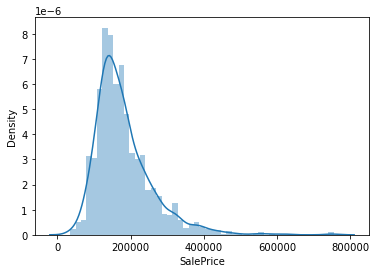

In [7]:
sns.distplot(df["SalePrice"])

##### the selling price of the house is rightly skewed (on the expected lines few houses contains few ammenities will superinflate the price of the house)

In [8]:
mean = df["SalePrice"].mean()
std_dev=df["SalePrice"].std()

print("The Mean of the Sale Price :",mean)
print("The standard deviation of the Sale Price is :",std_dev)
print("The Range of 1 Standard Deviation is [%f  %f]"%((mean-std_dev),(mean+std_dev)))
print("The Rnage of 2 standard deviation is [%f %f]"%((mean-2*std_dev),(mean+2*std_dev)))



print("\n\n\n")
print("The IQR Range of the Sale Price")
q3,q1=np.percentile(df["SalePrice"],[75,25])
print("The median of the Sale Price",np.percentile(df["SalePrice"],50))
print("The 25 percentile of the Sale Price",np.percentile(df["SalePrice"],25))
print("The 75 percentile of the Sale Price ",np.percentile(df["SalePrice"],75))
print("The 99% of the Sale Price ",np.percentile(df["SalePrice"],99))
print("The maximum of the sale price is ",max(df["SalePrice"]))

print("The IQR is :",q3-q1)

The Mean of the Sale Price : 180921.19589041095
The standard deviation of the Sale Price is : 79442.50288288663
The Range of 1 Standard Deviation is [101478.693008  260363.698773]
The Rnage of 2 standard deviation is [22036.190125 339806.201656]




The IQR Range of the Sale Price
The median of the Sale Price 163000.0
The 25 percentile of the Sale Price 129975.0
The 75 percentile of the Sale Price  214000.0
The 99% of the Sale Price  442567.01000000053
The maximum of the sale price is  755000
The IQR is : 84025.0


the above is the Univariate analysis of the target "SalePrice" and getting to know it better.

In [9]:
for i in list1:
    new_df=df[[i,"SalePrice"]]
    print(new_df.groupby(by=i).mean())


              SalePrice
MSZoning               
C (all)    74528.000000
FV        214014.061538
RH        131558.375000
RL        191004.994787
RM        126316.830275
            SalePrice
Street               
Grvl    130190.500000
Pave    181130.538514
           SalePrice
Alley               
Grvl   122219.080000
Pave   168000.585366
              SalePrice
LotShape               
IR1       206101.665289
IR2       239833.365854
IR3       216036.500000
Reg       164754.818378
                 SalePrice
LandContour               
Bnk          143104.079365
HLS          231533.940000
Low          203661.111111
Lvl          180183.746758
              SalePrice
Utilities              
AllPub     180950.95682
NoSeWa     137500.00000
               SalePrice
LotConfig               
Corner     181623.425856
CulDSac    223854.617021
FR2        177934.574468
FR3        208475.000000
Inside     176938.047529
               SalePrice
LandSlope               
Gtl        179956.799566
Mod     

### Explanation
Bivariate Analysis of the discrete categorical variable.
if the variable has more than 2 cardinal variable and doesn't have the range more than 1 standard deviation.
and also all the quality and condition variable because all the variance explained by them is already covered in "OverallCond" and "OverallQual" --> (this is mostly domain knowledge) (common sense).

the columns that have been eleminated are:
"PoolQC","Fence","FireplaceQu","MiscFeature","Alley","LotShape","LotConfig","LandSlope","Condition1","BldgType","RoofStyle","BsmtQual","BsmtExposure","BsmtCond","BsmtFinType1","BsmtFinType2","HeatingQC","FireplaceQu","GarageQual","GarageCond","GarageYrBlt","YearBuilt","Id","LotFrontage","BsmtFinSF2","MoSold","MiscVal","BsmtHalfBath","LowQualFinSF"

In [10]:
numerical_data=df.select_dtypes(exclude="object")

In [11]:
numerical_categorical=numerical_data[["MSSubClass","OverallQual","OverallCond"]]

In [12]:
for i in numerical_categorical.columns:
    new_df=df[[i,"SalePrice"]]
    print(new_df.groupby(by=i).mean())


                SalePrice
MSSubClass               
20          185224.811567
30           95829.724638
40          156125.000000
45          108591.666667
50          143302.972222
60          239948.501672
70          166772.416667
75          192437.500000
80          169736.551724
85          147810.000000
90          133541.076923
120         200779.080460
160         138647.380952
180         102300.000000
190         129613.333333
                 SalePrice
OverallQual               
1             50150.000000
2             51770.333333
3             87473.750000
4            108420.655172
5            133523.347607
6            161603.034759
7            207716.423197
8            274735.535714
9            367513.023256
10           438588.388889
                 SalePrice
OverallCond               
1             61000.000000
2            141986.400000
3            101929.400000
4            120438.438596
5            203146.914738
6            153961.591270
7            15814

### Explanation:
<br>Here the MSSubClass is unoredered categorical variable.<br>
and the remaing two "OverallQual" and "OverallCond" are ordered categorical variable.

In [13]:
numerical_data=numerical_data.drop(columns=["MSSubClass","OverallQual","OverallCond"])

In [14]:
#sns.pairplot(numerical_data)

In [15]:
new_df=df[["YearBuilt","SalePrice"]]
print(new_df.groupby(by="YearBuilt").mean())

               SalePrice
YearBuilt               
1872       122000.000000
1875        94000.000000
1880       200619.750000
1882       168000.000000
1885       111250.000000
1890       142200.000000
1892       291250.000000
1893       325000.000000
1898       106000.000000
1900       112492.600000
1904       157500.000000
1905       163000.000000
1906       135000.000000
1908       183500.000000
1910       111959.058824
1911       130000.000000
1912       119466.666667
1913        90350.000000
1914       126055.285714
1915       134387.500000
1916       139800.000000
1917       129500.000000
1918       172421.428571
1919       154833.333333
1920       112903.333333
1921       140813.333333
1922       109237.500000
1923       159428.571429
1924       105985.714286
1925       129190.625000
1926       124144.444444
1927        82666.666667
1928       135557.142857
1929       153000.000000
1930       103588.888889
1931       126650.000000
1932       233358.500000
1934       220766.666667


In [16]:
new_df=df[["YearRemodAdd","SalePrice"]]
print(new_df.groupby(by="YearRemodAdd").mean())

                  SalePrice
YearRemodAdd               
1950          117463.056180
1951          129975.000000
1952          110398.600000
1953          147640.000000
1954          121142.857143
1955          124511.111111
1956          124235.000000
1957          132656.444444
1958          128386.666667
1959          136054.555556
1960          145212.500000
1961          131881.250000
1962          145471.428571
1963          139765.384615
1964          159218.181818
1965          143951.736842
1966          149914.666667
1967          131458.333333
1968          153095.882353
1969          157297.071429
1970          139367.307692
1971          120230.555556
1972          127330.000000
1973          139081.818182
1974          159357.142857
1975          174652.400000
1976          159868.500000
1977          158702.000000
1978          158362.500000
1979          150357.200000
1980          154812.500000
1981          184425.000000
1982          121271.428571
1983          136880

In [17]:
numerical_data.corr()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,-0.012713,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


### Explanation
1) Dropped the least correlated variable with the target variable (>= 0.04)<br>
2) Dropped highly correlated independent variables (>=.70)<br>
the list of all the dropped columns are:
"PoolQC","Fence","FireplaceQu","MiscFeature","Alley","LotShape","LotConfig","LandSlope","Condition1","BldgType","RoofStyle","BsmtQual","BsmtExposure","BsmtCond","BsmtFinType1","BsmtFinType2","HeatingQC","FireplaceQu","GarageQual","GarageCond","GarageYrBlt","YearBuilt","Id","LotFrontage","BsmtFinSF2","MoSold","MiscVal","BsmtHalfBath","LowQualFinSF"

In [18]:
# i will drop 32 columns
columns_drop=["PoolQC","Fence","FireplaceQu","MiscFeature","Alley","LotShape","LotConfig","LandSlope","Condition1","BldgType","RoofStyle","BsmtQual","BsmtExposure","BsmtCond","BsmtFinType1","BsmtFinType2","HeatingQC","FireplaceQu","GarageQual","GarageCond","GarageYrBlt","YearBuilt","Id","LotFrontage","BsmtFinSF2","MoSold","MiscVal","BsmtHalfBath","LowQualFinSF"]
df=df.drop(columns=columns_drop)

In [19]:
df.shape

(1460, 53)

## Derived Variable : Age

In [20]:
df["Age"]=df["YrSold"]-df["YearRemodAdd"]

In [21]:
df=df.drop(columns=["YrSold","YearRemodAdd"])

In [22]:
df.shape

(1460, 52)

## Imputing the Values

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition2     1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  RoofMatl       1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1452 non-null   object 
 15  MasVnrArea     1452 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

### how the imputing variable was used
While imputing categorical variable i have used Mode and while imputing the numerical variable i have used mean.

In [24]:
df["GarageType"].fillna(value=df["GarageType"].value_counts().index[0],inplace=True)
df["GarageFinish"].fillna(value=df["GarageFinish"].value_counts().index[0],inplace=True)
df["Electrical"].fillna(value=df["Electrical"].value_counts().index[0],inplace=True)
df["MasVnrType"].fillna(value=df["MasVnrType"].value_counts().index[0],inplace=True)
df["MasVnrArea"].fillna(value=round(df["MasVnrArea"].mean(),2),inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition2     1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  RoofMatl       1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

## Creating the dummy variables 

In [26]:
categorical_data=df.select_dtypes(include="object")
X_categorical=pd.get_dummies(df[categorical_data.columns],drop_first=True)

In [27]:
X_categorical.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [28]:
df=df.drop(columns=categorical_data.columns)

In [29]:
df.shape

(1460, 28)

In [30]:
df=pd.concat([df,X_categorical],axis=1)
df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,196.0,706,150,856,856,854,1710,1,2,1,3,1,8,0,2,548,0,61,0,0,0,0,208500,5,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,2,460,298,0,0,0,0,0,181500,31,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,162.0,486,434,920,920,866,1786,1,2,1,3,1,6,1,2,608,0,42,0,0,0,0,223500,6,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,0.0,216,540,756,961,756,1717,1,1,0,3,1,7,1,3,642,0,35,272,0,0,0,140000,36,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,

## Train Test Split
here the split is 80% for training and 20 for testing.

In [31]:
df_train,df_test=train_test_split(df,train_size=0.8,test_size=0.2,random_state=1)

In [32]:
y=df_train.pop("SalePrice")
X=df_train
y_test=df_test.pop("SalePrice")
X_test=df_test

## Feature Scaling : MinMaxScaler

In [33]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X_test=scaler.transform(X_test)

## Need for Lasso and Ridge

In [34]:
model=LinearRegression()
model.fit(X,y)
y_pred=model.predict(X)
train_score=r2_score(y,y_pred)
y_pred=model.predict(X_test)
test_score=r2_score(y_test,y_pred)

In [35]:
print("The train Score is :",train_score)
print("The test score is :",test_score)

The train Score is : 0.9190419903660997
The test score is : -8.098717845989415e+22


As you can clearly see the model has overfitted. and hence the Need for REGULARISATION.

## HyperParameter Tuning :using GridSerachCV

## RIDGE : Regularisation

In [36]:
param_grid={"alpha":[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
grid=GridSearchCV(Ridge(),param_grid,n_jobs=-1,cv=5)
grid.fit(X,y)
print(grid.best_params_)

{'alpha': 6}


## LASSO : Regularisation

In [37]:
grid=GridSearchCV(Lasso(),param_grid,n_jobs=-1,cv=5)
grid.fit(X,y)
print(grid.best_params_)

{'alpha': 100}


## Model Evaluation

## Lasso: with tuned alpha

In [38]:
lasso=Lasso(alpha=100)
lasso.fit(X,y)
y_pred=lasso.predict(X)
train_score=r2_score(y,y_pred)
print("The train R2 score is :",train_score)
y_pred=lasso.predict(X_test)
test_score=r2_score(y_test,y_pred)
print("The test R2 Score is :",test_score)

The train R2 score is : 0.876444464387907
The test R2 Score is : 0.8529746265078395


## Ridge: with tuned alpha

In [39]:
ridge=Ridge(alpha=6)
ridge.fit(X,y)
y_pred=ridge.predict(X)
train_score=r2_score(y,y_pred)
print("The train R2 score is :",train_score)
y_pred=lasso.predict(X_test)
test_score=r2_score(y_test,y_pred)
print("The test R2 Score is :",test_score)

The train R2 score is : 0.8730130324812571
The test R2 Score is : 0.8529746265078395


## Summary:
I found the alpha tuned ridge and lasso and according to my analysis it is best to go with the lasso regression.

### Problem Statement part 2

In [40]:
lasso=Lasso(alpha=200)
lasso.fit(X,y)
lasso.fit(X,y)
y_pred=lasso.predict(X)
train_score=r2_score(y,y_pred)
print("The lasso train R2 score is :",train_score)
y_pred=lasso.predict(X_test)
test_score=r2_score(y_test,y_pred)
print("The lasso test R2 Score is :",test_score)
print("\n\n\n\n")



ridget=Ridge(alpha=12)
ridge.fit(X,y)
y_pred=ridge.predict(X)
train_score=r2_score(y,y_pred)
print("The ridge train R2 score is :",train_score)
y_pred=lasso.predict(X_test)
test_score=r2_score(y_test,y_pred)
print("The ridge test R2 Score is :",test_score)


list1=list(df.columns)
list1.remove("SalePrice")
dict1={"Lasso_coefficients":list(lasso.coef_),"Ridge_coeffecient":list(ridge.coef_),"variables":list1}
Answer_Data=pd.DataFrame(dict1)

The lasso train R2 score is : 0.8611019037831287
The lasso test R2 Score is : 0.847926417324067





The ridge train R2 score is : 0.8730130324812571
The ridge test R2 Score is : 0.847926417324067


In [41]:
Answer_Data.sort_values(by="Lasso_coefficients",ascending=False)

,Lasso_coefficients,Ridge_coeffecient,variables
10,154893.550670,48535.284212,GrLivArea
2,104889.458718,65255.619545,OverallQual
18,53945.396176,37565.713762,GarageCars
80,53001.820901,44322.256353,RoofMatl_WdShngl
57,49188.821429,45031.336768,Neighborhood_StoneBr
50,39510.831749,38059.477747,Neighborhood_NoRidge
51,35742.353050,31479.205743,Neighborhood_NridgHt
11,30941.415997,25606.710927,BsmtFullBath
16,30173.381332,44027.938287,TotRmsAbvGrd
5,22643.018714,23912.190287,BsmtFinSF1


In [42]:
Answer_Data.sort_values(by="Ridge_coeffecient",ascending=False)

,Lasso_coefficients,Ridge_coeffecient,variables
2,104889.458718,65255.619545,OverallQual
10,154893.550670,48535.284212,GrLivArea
57,49188.821429,45031.336768,Neighborhood_StoneBr
80,53001.820901,44322.256353,RoofMatl_WdShngl
16,30173.381332,44027.938287,TotRmsAbvGrd
8,397.339056,43765.171115,1stFlrSF
50,39510.831749,38059.477747,Neighborhood_NoRidge
18,53945.396176,37565.713762,GarageCars
12,21053.210401,32179.828011,FullBath
9,0.000000,31957.587597,2ndFlrSF


In [43]:
lasso=Lasso(alpha=100)
lasso.fit(X,y)

ridget=Ridge(alpha=6)
ridge.fit(X,y)

list1=list(df.columns)
list1.remove("SalePrice")
dict1={"Lasso_coefficients":list(lasso.coef_),"Ridge_coeffecient":list(ridge.coef_),"variables":list1}
Answer_Data=pd.DataFrame(dict1)

In [44]:
Answer_Data.sort_values(by="Lasso_coefficients",ascending=False)

,Lasso_coefficients,Ridge_coeffecient,variables
10,168776.356434,48535.284212,GrLivArea
2,94511.895316,65255.619545,OverallQual
80,69112.180928,44322.256353,RoofMatl_WdShngl
57,53448.155983,45031.336768,Neighborhood_StoneBr
18,50554.444492,37565.713762,GarageCars
1,47050.244856,26464.054977,LotArea
50,40833.125875,38059.477747,Neighborhood_NoRidge
51,36421.361256,31479.205743,Neighborhood_NridgHt
16,32560.184732,44027.938287,TotRmsAbvGrd
5,29952.861422,23912.190287,BsmtFinSF1


In [45]:
Answer_Data.sort_values(by="Ridge_coeffecient",ascending=False)

,Lasso_coefficients,Ridge_coeffecient,variables
2,94511.895316,65255.619545,OverallQual
10,168776.356434,48535.284212,GrLivArea
57,53448.155983,45031.336768,Neighborhood_StoneBr
80,69112.180928,44322.256353,RoofMatl_WdShngl
16,32560.184732,44027.938287,TotRmsAbvGrd
8,6853.752849,43765.171115,1stFlrSF
50,40833.125875,38059.477747,Neighborhood_NoRidge
18,50554.444492,37565.713762,GarageCars
12,25125.883041,32179.828011,FullBath
9,0.000000,31957.587597,2ndFlrSF


In [46]:
Deep_df=df.copy()

In [49]:
columns=["Condition2_PosN","GrLivArea","OverallQual","RoofMatl_WdShngl","Neighborhood_StoneBr"]

In [50]:
Deep_df=Deep_df.drop(columns=columns)

In [51]:
Deep_df_train,Deep_df_test=train_test_split(Deep_df,train_size=0.8,test_size=0.2,random_state=1)
y_train_prb=Deep_df_train.pop("SalePrice")
X_train_prb=Deep_df_train
y_test_prb=Deep_df_test.pop("SalePrice")
X_test_prb=Deep_df_test

In [52]:
lasso=Lasso(alpha=100)
lasso.fit(X_train_prb,y_train_prb)


list1=list(Deep_df.columns)
list1.remove("SalePrice")
dict1={"Lasso_coefficients":list(lasso.coef_),"variables":list1}
Answer_Data=pd.DataFrame(dict1)

In [53]:
Answer_Data.sort_values(by="Lasso_coefficients",ascending=False)

,Lasso_coefficients,variables
30,33530.794820,LandContour_HLS
48,31848.474117,Neighborhood_NoRidge
49,31436.354968,Neighborhood_NridgHt
58,23511.908830,Condition2_Norm
153,21435.406810,SaleType_New
138,17161.439751,Functional_Typ
16,14826.374273,GarageCars
78,13429.491196,Exterior1st_BrkFace
10,11205.874642,FullBath
32,11002.677005,LandContour_Lvl


In [54]:
y_pred_train_pr=lasso.predict(X_train_prb)
score=r2_score(y_train_prb,y_pred_train_pr)
print("The train R2score is :",score)
y_pred_pr=lasso.predict(X_test_prb)
score=r2_score(y_test_prb,y_pred_pr)
print("The test R2_score is :",score)

The train R2score is : 0.8543298152042788
The test R2_score is : 0.8269266085101864
